In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Seed_Data.csv']


In [2]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='../input/Seed_Data.csv',
    header=None,
    sep=',')

df.columns=['A', 'B', 'C', 'D', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,A,B,C,D,class
144,11.56,13.31,0.8198,4.062,type2
145,11.81,13.45,0.8198,4.898,type2
146,10.91,12.80,0.8372,4.179,type2
147,11.23,12.82,0.8594,7.524,type2
148,10.59,12.41,0.8648,4.975,type2


In [3]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [4]:
X

array([[15.26  , 14.84  ,  0.871 ,  2.221 ],
       [14.88  , 14.57  ,  0.8811,  1.018 ],
       [14.29  , 14.09  ,  0.905 ,  2.699 ],
       [13.84  , 13.94  ,  0.8955,  2.259 ],
       [16.14  , 14.99  ,  0.9034,  1.355 ],
       [14.38  , 14.21  ,  0.8951,  2.462 ],
       [14.69  , 14.49  ,  0.8799,  3.586 ],
       [14.11  , 14.1   ,  0.8911,  2.7   ],
       [16.63  , 15.46  ,  0.8747,  2.04  ],
       [16.44  , 15.25  ,  0.888 ,  1.969 ],
       [15.26  , 14.85  ,  0.8696,  4.543 ],
       [14.03  , 14.16  ,  0.8796,  1.717 ],
       [13.89  , 14.02  ,  0.888 ,  3.986 ],
       [13.78  , 14.06  ,  0.8759,  3.136 ],
       [13.74  , 14.05  ,  0.8744,  2.932 ],
       [14.59  , 14.28  ,  0.8993,  4.185 ],
       [13.99  , 13.83  ,  0.9183,  5.234 ],
       [15.69  , 14.75  ,  0.9058,  1.599 ],
       [14.7   , 14.21  ,  0.9153,  1.767 ],
       [12.72  , 13.57  ,  0.8686,  4.102 ],
       [14.16  , 14.4   ,  0.8584,  3.072 ],
       [14.11  , 14.26  ,  0.8722,  2.688 ],
       [15

In [5]:
y

array(['type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type0', 'type0', 'type0', 'type0', 'type0', 'type0', 'type0',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'type1', 'type1', 'type1', 'type1', 'type1', 'type1',
       'type1', 'typ

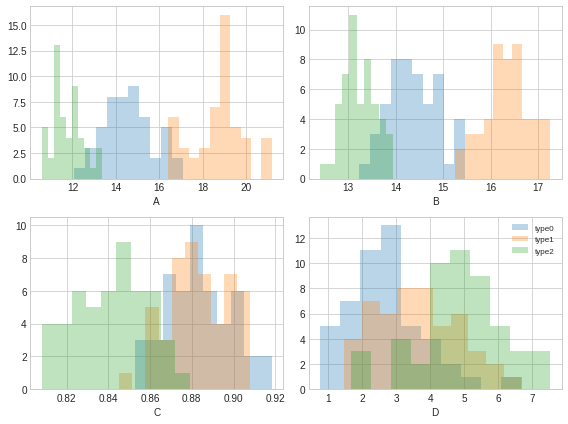

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'type0',
              2: 'type1',
              3: 'type2'}

feature_dict = {0: 'A',
                1: 'B',
                2: 'C',
                3: 'D'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('type0', 'type1', 'type2'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [8]:
X_std

array([[ 0.07789533,  0.14005428,  0.06391876, -1.00937196],
       [-0.04686941, -0.05967573,  0.46521764, -1.81370527],
       [-0.2405831 , -0.41475132,  1.41482587, -0.68977818],
       [-0.38833082, -0.52571244,  1.03736653, -0.98396492],
       [ 0.36682422,  0.2510154 ,  1.35125377, -1.58838497],
       [-0.21103355, -0.32598242,  1.02147351, -0.84823786],
       [-0.10925179, -0.118855  ,  0.41753856, -0.09672444],
       [-0.29968219, -0.40735391,  0.86254326, -0.68910957],
       [ 0.52770508,  0.59869358,  0.21092924, -1.13038969],
       [ 0.4653227 ,  0.44334801,  0.73937231, -1.17786073],
       [ 0.07789533,  0.14745169,  0.00829317,  0.54313174],
       [-0.32594845, -0.36296946,  0.40561879, -1.34634951],
       [-0.37191441, -0.46653318,  0.73937231,  0.17071806],
       [-0.40803052, -0.43694354,  0.25860831, -0.39759725],
       [-0.42116365, -0.44434095,  0.19900947, -0.53399292],
       [-0.14208461, -0.27420057,  1.18835027,  0.3037707 ],
       [-0.33908158, -0.

In [9]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676  1.00176916  0.66576533 -0.28409088]
 [ 1.00176916  1.00675676  0.59547779 -0.26508025]
 [ 0.66576533  0.59547779  1.00675676 -0.43868935]
 [-0.28409088 -0.26508025 -0.43868935  1.00675676]]


In [10]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.57785274  0.72951115  0.30360632 -0.20426182]
 [ 0.5626383  -0.67852131  0.33664921 -0.33123148]
 [ 0.50187909 -0.08556002 -0.18395668  0.84080723]
 [-0.31247676 -0.01008983  0.87215277  0.37630575]]

Eigenvalues 
[2.71400692e+00 8.52755865e-04 8.98070516e-01 4.14096834e-01]


In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.714006921407883
0.8980705155098343
0.41409683424442173
0.0008527558648906497


In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

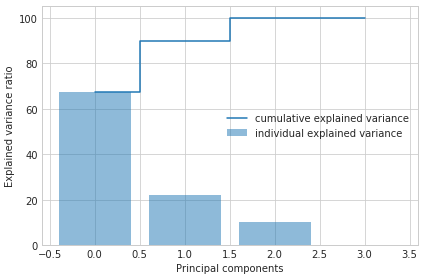

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.57785274  0.30360632]
 [ 0.5626383   0.33664921]
 [ 0.50187909 -0.18395668]
 [-0.31247676  0.87215277]]


In [15]:
Y = X_std.dot(matrix_w)

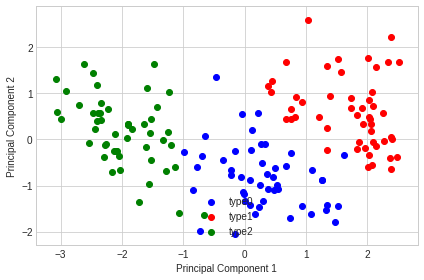

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('type0', 'type1', 'type2'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()